In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from mpl_toolkits.basemap import Basemap
import datetime
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import itertools
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import rcParams
from imblearn.over_sampling import SMOTE
import sklearn.svm as svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
#from keras.models import Sequential
#from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


#Data Exploration

In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/Train.csv')
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,Pangani,Mafurini,Kilimanjaro,3,5,Hai,Machame Kaskazini,90,True,GeoData Consultants Ltd,Water Board,Machame water supply,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,Lake Nyasa,Ituni,Iringa,11,5,Ludewa,Luana,70,False,GeoData Consultants Ltd,Private operator,Mgowel,False,1984,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,Pangani,Melebuki,Arusha,2,2,Arusha Rural,Kimnyaki,150,True,GeoData Consultants Ltd,VWC,Saitero olosaita pipe line,True,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,Rufiji,Darajani,Mbeya,12,2,Mbeya Rural,Inyala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,wug,user-group,pay annually,annually,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,Pangani,Mwira A,Kilimanjaro,3,2,Mwanga,Shinghatini,34,True,GeoData Consultants Ltd,VWC,Churu water supply,False,2007,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [3]:
df_test = pd.read_csv('/content/drive/MyDrive/test.csv')
df_test.head()

,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0,21215,0.0,2011-02-25,Kuamu,1676,Kuamu,35.247289,-8.113243,none,0,Rufiji,Mahanzi,Iringa,11,1,Iringa Rural,Wasa,769,True,GeoData Consultants Ltd,VWC,Wasa,True,2004,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe
1,1,25893,0.0,2011-04-17,Kirde,0,DWE,36.163435,-5.218454,Zahanati,0,Wami / Ruvu,Uzunguni,Dodoma,1,1,Kondoa,Chandama,0,True,GeoData Consultants Ltd,VWC,Soya,False,0,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
2,2,15713,0.0,2011-03-27,Water,0,Gover,36.363337,-7.297600,Uganda,0,Rufiji,Uganda,Dodoma,1,1,Mpwapwa,Ipera,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
3,3,17247,0.0,2011-07-14,Ka,0,KA,31.496315,-2.167140,Kakindo,0,Lake Victoria,Nyamilanda A,Kagera,18,3,Muleba,Kyebitembe,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
4,4,1248,0.0,2011-07-31,World Vision,0,KYASHA ENTERPR,31.843905,-1.244841,Shule Ya Msingi Ibosa,0,Lake Victoria,Ibosa,Kagera,18,2,Bukoba Rural,Nyakato,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
#train data
print("Shape of training data:",df_train.shape , "\n Some info:")
display(df_train.info())
print("Number of dtypes present:\n",df_train.dtypes.value_counts())

Shape of training data: (44550, 41) 
 Some info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44550 non-null  int64  
 1   amount_tsh             44550 non-null  float64
 2   date_recorded          44550 non-null  object 
 3   funder                 41757 non-null  object 
 4   gps_height             44550 non-null  int64  
 5   installer              41743 non-null  object 
 6   longitude              44550 non-null  float64
 7   latitude               44550 non-null  float64
 8   wpt_name               44550 non-null  object 
 9   num_private            44550 non-null  int64  
 10  basin                  44550 non-null  object 
 11  subvillage             44263 non-null  object 
 12  region                 44550 non-null  object 
 13  region_code            44550 non-null  int64  
 14  distr

None

Number of dtypes present:
 object     31
int64       7
float64     3
dtype: int64


It is observed that most of the features are object type. Also some features have large NULL values in them. Total object type features are 31, int type are 7 and float type are 3.


In [5]:
#test data
print("Shape of training data:",df_test.shape , "\n Some info:")
display(df_test.info())
print("Number of dtypes present:\n",df_test.dtypes.value_counts())

Shape of training data: (14850, 41) 
 Some info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             14850 non-null  int64  
 1   id                     14850 non-null  int64  
 2   amount_tsh             14850 non-null  float64
 3   date_recorded          14850 non-null  object 
 4   funder                 14008 non-null  object 
 5   gps_height             14850 non-null  int64  
 6   installer              14002 non-null  object 
 7   longitude              14850 non-null  float64
 8   latitude               14850 non-null  float64
 9   wpt_name               14850 non-null  object 
 10  num_private            14850 non-null  int64  
 11  basin                  14850 non-null  object 
 12  subvillage             14766 non-null  object 
 13  region                 14850 non-null  object 
 14  regio

None

Number of dtypes present:
 object     30
int64       8
float64     3
dtype: int64


Most of the features are object type. Total object type features are 30, int type are 8 and float type are 3.


#Feature Engineering

In [6]:
#Feature 'id' is of no use, hence dropping the column, also column 0 of test data is redundant data
df_train.drop(['id'], axis=1, inplace=True)
df_test.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [7]:
df_train = df_train.dropna(how = 'all')
print(df_train['construction_year'].describe())
#Dropping 0 year from the feature
#df_train = df_train.drop(df_train[df_train['construction_year'] < 1].index)
#print(df_train['construction_year'].describe())
#After removing 0 from the data, mean value comes out to be 1996
df_train['construction_year'] = df_train['construction_year'].replace({0:1996})
print(df_train['construction_year'].describe())

count    44550.000000
mean      1295.782155
std        953.183961
min          0.000000
25%          0.000000
50%       1985.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64
count    44550.000000
mean      1996.555129
std         10.056747
min       1960.000000
25%       1996.000000
50%       1996.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64


In [8]:
df_test['construction_year'].describe()
#replacing zero values with median construction year
df_test['construction_year'] = df_test['construction_year'].replace({0:1986})

In [9]:
display(df_train['scheme_name'].value_counts())
print('Number of schemes with more than 100 entries:',(df_train['scheme_name'].value_counts()>100).sum())

K                                               528
None                                            494
Borehole                                        402
M                                               310
Chalinze wate                                   300
                                               ... 
QWUICKWIN                                         1
Kazilamihunda sub gravity point source water      1
Uswa                                              1
Marine Park /Village                              1
Mowo water supply                                 1
Name: scheme_name, Length: 2506, dtype: int64

Number of schemes with more than 100 entries: 24


The feature "scheme_name" has 2506 different schemes in only 23440 out of 44450 entries. Most of the data is not available.  Also only some schemes(24) are there with more than 100 entries. Therefore dropping the column "scheme_name".

In [10]:
#df_train.drop(['scheme_name'], axis=1, inplace=True)
#Same is for test data, thus removing it from test data also
df_test.drop(['scheme_name'], axis=1, inplace=True)

In [11]:
print(df_train['date_recorded'].describe())

count          44550
unique           346
top       2011-03-15
freq             423
Name: date_recorded, dtype: object


In [12]:
# Training data
# converting date entered as string into time delta in days
df_train.date_recorded = pd.to_datetime(df_train.date_recorded)
#data_test.date_recorded = pd.to_datetime(data_test.date_recorded)
df_train.construction_year = pd.to_datetime(df_train.construction_year,format='%Y')
#reference_date = datetime.datetime(1950,1,1) # reference date to calculate time deltas = minimum construction year
df_train['time_lapsed'] = (df_train['date_recorded'] - df_train['construction_year'])
df_train['time_lapsed'] = df_train['time_lapsed'].astype(int)
df_train['time_lapsed'] = df_train['time_lapsed']/pow(10,10)
#data_test['date_recorded_delta'] = (data_test['date_recorded'] - reference_date)  / np.timedelta64(1,'D')

In [13]:
# Test data
# converting date entered as string into time delta in days
df_test.date_recorded = pd.to_datetime(df_test.date_recorded)
df_test.construction_year = pd.to_datetime(df_test.construction_year,format='%Y')
#reference_date = datetime.datetime(1960,1,1) # reference date to calculate time deltas = minimum construction year
df_test['time_lapsed'] = (df_test['date_recorded'] - df_test['construction_year'])
df_test['time_lapsed'] = df_test['time_lapsed'].astype(int)

In [14]:
display(df_train['recorded_by'].value_counts())

GeoData Consultants Ltd    44550
Name: recorded_by, dtype: int64

In [15]:
display(df_test['recorded_by'].value_counts())

GeoData Consultants Ltd    14850
Name: recorded_by, dtype: int64

We can remove the feature as it has only one entry

In [16]:
df_train.drop(['recorded_by'], axis=1, inplace=True)
df_test.drop(['recorded_by'], axis=1, inplace=True)

In [17]:
print("Shape of training data:",df_train.shape)
print("Shape of test data:",df_test.shape)

Shape of training data: (44550, 40)
Shape of test data: (14850, 38)


Replce the zero values in the feature "amount_tsh"

In [18]:
display(df_train['amount_tsh'].value_counts())
temp = df_train['amount_tsh'].copy()
temp = temp.drop(temp[temp < 1].index)
display(temp.describe())
df_train['amount_tsh'] = df_train['amount_tsh'].replace({0:1029})


0.0         31231
500.0        2321
50.0         1881
20.0         1117
1000.0       1116
            ...  
11000.0         1
38000.0         1
170000.0        1
6300.0          1
12.0            1
Name: amount_tsh, Length: 85, dtype: int64

count     13316.000000
mean       1029.183989
std        4309.647985
min           2.000000
25%          50.000000
50%         250.000000
75%        1000.000000
max      170000.000000
Name: amount_tsh, dtype: float64

#Visualisation

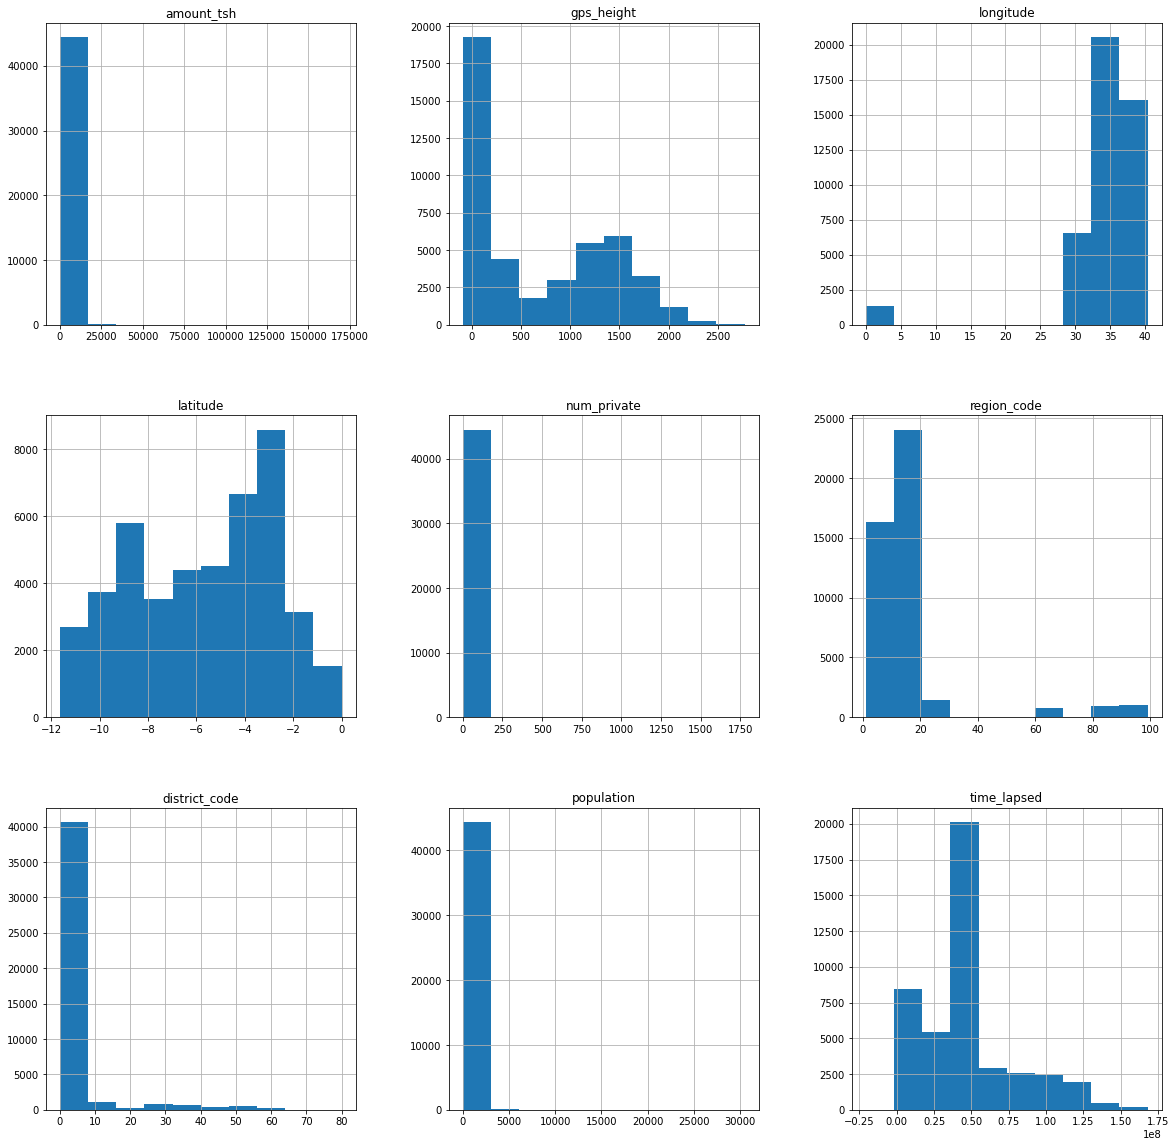

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


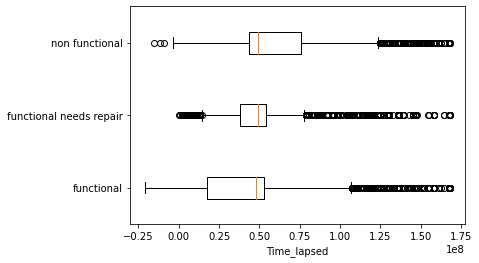

In [19]:
df_train.hist(bins=10, figsize=(20,20))
plt.show()
data = [df_train[df_train["status_group"]=="functional"]['time_lapsed'].values,
        df_train[df_train["status_group"]=="functional needs repair"]['time_lapsed'].values,
        df_train[df_train["status_group"]=="non functional"]['time_lapsed'].values]
fig,ax = plt.subplots()
ax.boxplot(data, vert=False)
ax.set_xlabel("Time_lapsed")
ax.set_yticklabels(["functional","functional needs repair","non functional"])
plt.show()

#Feature Selection

In [20]:
df_train.columns
columns_used = ['amount_tsh','funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'scheme_management', 'permit', 'extraction_type',
        'management', 'management_group', 'payment','payment_type', 'water_quality','quantity',
       'quantity_group', 'source', 'source_class','waterpoint_type','time_lapsed']
X_train = df_train[columns_used]
y = df_train['status_group']
X_test = df_test[columns_used]

In [21]:
X_train.isnull().sum()

amount_tsh              0
funder               2793
gps_height              0
installer            2807
longitude               0
latitude                0
num_private             0
basin                   0
subvillage            287
region                  0
region_code             0
district_code           0
lga                     0
ward                    0
population              0
public_meeting       2491
scheme_management    2832
permit               2336
extraction_type         0
management              0
management_group        0
payment                 0
payment_type            0
water_quality           0
quantity                0
quantity_group          0
source                  0
source_class            0
waterpoint_type         0
time_lapsed             0
dtype: int64

In [22]:
#  Replacing NaN values by "0"
X_train['funder'] = X_train['funder'].fillna(X_train['funder'].mode()[0])
X_test['funder'] = X_test['funder'].fillna(X_test['funder'].mode()[0])
X_train.installer = X_train.installer.fillna("0")
X_test.installer = X_test.installer.fillna("0")

X_train.subvillage = X_train.subvillage.fillna("0")
X_test.subvillage = X_test.subvillage.fillna("0")
X_train.public_meeting = X_train.public_meeting.fillna("0")
X_test.public_meeting = X_test.public_meeting.fillna("0")

X_train.scheme_management = X_train.scheme_management.fillna("0")
X_test.scheme_management = X_test.scheme_management.fillna("0")
# Replacing NaN values by average values
permit_avg = X_train.permit.mean()

# if permit undefined, replace by the mean
X_train.permit = X_train.permit.fillna(permit_avg)
X_test.permit = X_test.permit.fillna(permit_avg)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [23]:
for col in columns_used:
  if X_train[col].dtype.name in ["object"]:
    print(col,X_train[col].dtype.name)
reqd_col = ['installer','basin','subvillage','region','lga','ward','public_meeting','scheme_management',
            'permit','extraction_type','management','management_group','payment','payment_type','water_quality',
            'quality_group','quantity','quantity_group','source','source_class','waterpoint_type']
#data = X_train[reqd_col]

funder object
installer object
basin object
subvillage object
region object
lga object
ward object
public_meeting object
scheme_management object
permit object
extraction_type object
management object
management_group object
payment object
payment_type object
water_quality object
quantity object
quantity_group object
source object
source_class object
waterpoint_type object


## Encoding, fitting and transforming

In [24]:
# Concatenate train and test datasets to proceed with one-hot encoding, so that some objects from the test dataset
# might not appear in the training dataset.
from sklearn.preprocessing import OrdinalEncoder
#X_test.index = range(len(X_train.index), len(X_train.index) + len(X_test.index))
#data = pd.concat([X_train, X_test])           
#for col in reqd_col:
#    data = pd.get_dummies(data, sparse=True, prefix=col, columns=[col],drop_first=True)

#X_train = pd.get_dummies(X_train,drop_first=True)
oe = OrdinalEncoder()
for col in X_train.columns:
  if X_train[col].dtype.name in ['object']:
    X_train[col] = oe.fit_transform(X_train[[col]].astype(str))
#data = oe.fit_transform(data)
#ohe = OneHotEncoder(drop='First')
#data[reqd_col] = ohe.fit_transform(data[reqd_col])
#X_train = data.loc[X_train.index, :]
#X_test = data.loc[X_test.index, :]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [25]:
list(X_train.columns)

['amount_tsh',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quantity',
 'quantity_group',
 'source',
 'source_class',
 'waterpoint_type',
 'time_lapsed']

In [26]:
X_train.shape

(44550, 30)

## Feature Scaling and framework implementation

##Random forest classifier

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini',n_estimators=500,max_features='auto',oob_score=True,random_state=1,n_jobs=-1)

param_grid = {"min_samples_split" : [4, 6, 8],"n_estimators" : [500, 700, 1000]}

clf = GridSearchCV(estimator=rfc,param_grid=param_grid,scoring='accuracy',cv=2,n_jobs=-1)

print("Fitting the classifier to the training set")

clf = clf.fit(X_train.values, y.values.ravel())
print("Best estimator found by grid search:")

print(clf.best_score_)
print(clf.best_params_)

Fitting the classifier to the training set


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best estimator found by grid search:
0.7991245791245791
{'min_samples_split': 6, 'n_estimators': 1000}


In [28]:
rf = RandomForestClassifier(criterion='gini',min_samples_split=6,n_estimators=1000,max_features='auto',oob_score=True,random_state=1,n_jobs=-1)
                            
rf.fit(X_train.values, y.values.ravel())
print(rf.oob_score_)

0.8127272727272727


In [29]:
rf.feature_importances_

array([0.01879636, 0.03452111, 0.04573452, 0.03008997, 0.08388784,
       0.08093759, 0.00129156, 0.0131356 , 0.05408354, 0.01743577,
       0.01684896, 0.01771698, 0.02712827, 0.04054665, 0.03208985,
       0.00737431, 0.01354199, 0.00750086, 0.04110159, 0.01443968,
       0.00604652, 0.01921822, 0.01805744, 0.01196897, 0.07903688,
       0.08795177, 0.02313081, 0.00695363, 0.06736624, 0.0820665 ])

##Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=50)
decision_tree.fit(X_train, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

def con_matrix_analysis(model):
  x = model.predict(X_train)
  
  print(classification_report(y, x,
        target_names=['Functional', 'Needs Repair', 'Not-Functional']))

  con_matrix = pd.DataFrame(confusion_matrix(y, x), 
             columns=['Predicted Functional', 'Predicted Needs Repair', 'Predicted Not-Functional'], 
             index=['Actual Functional', 'Actual Needs Repair', 'Actual Not-Functional'])
                            
  sns.heatmap(data=con_matrix, cmap='cool')
  plt.show();
  return con_matrix

Decision tree metric and heatmap

                precision    recall  f1-score   support

    Functional       1.00      1.00      1.00     24194
  Needs Repair       1.00      1.00      1.00      3238
Not-Functional       1.00      1.00      1.00     17118

      accuracy                           1.00     44550
     macro avg       1.00      1.00      1.00     44550
  weighted avg       1.00      1.00      1.00     44550



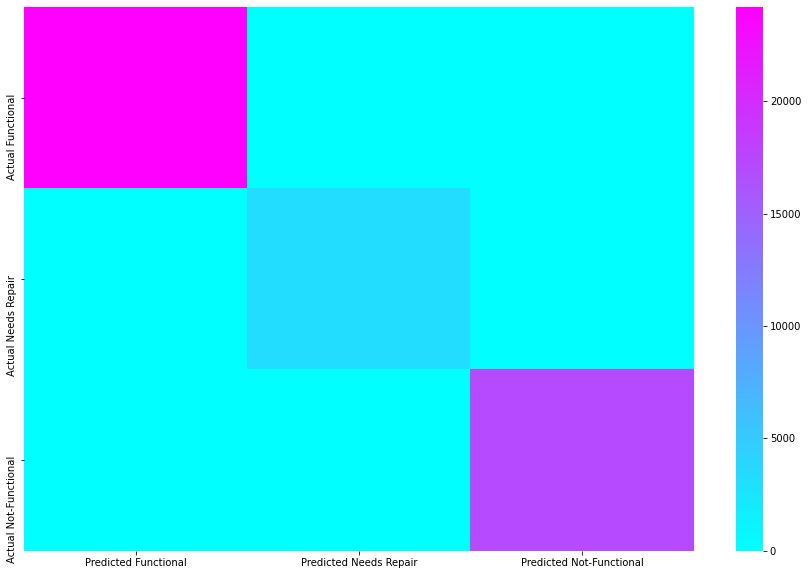

,Predicted Functional,Predicted Needs Repair,Predicted Not-Functional
Actual Functional,24194,0,0
Actual Needs Repair,7,3231,0
Actual Not-Functional,1,0,17117


In [50]:
rcParams['figure.figsize'] = 15, 10
print("Decision tree metric and heatmap\n")
con_matrix_analysis(decision_tree)

Decision tree metric and heatmap

                precision    recall  f1-score   support

    Functional       0.94      0.99      0.96     24194
  Needs Repair       0.94      0.73      0.82      3238
Not-Functional       0.97      0.95      0.96     17118

      accuracy                           0.95     44550
     macro avg       0.95      0.89      0.91     44550
  weighted avg       0.95      0.95      0.95     44550



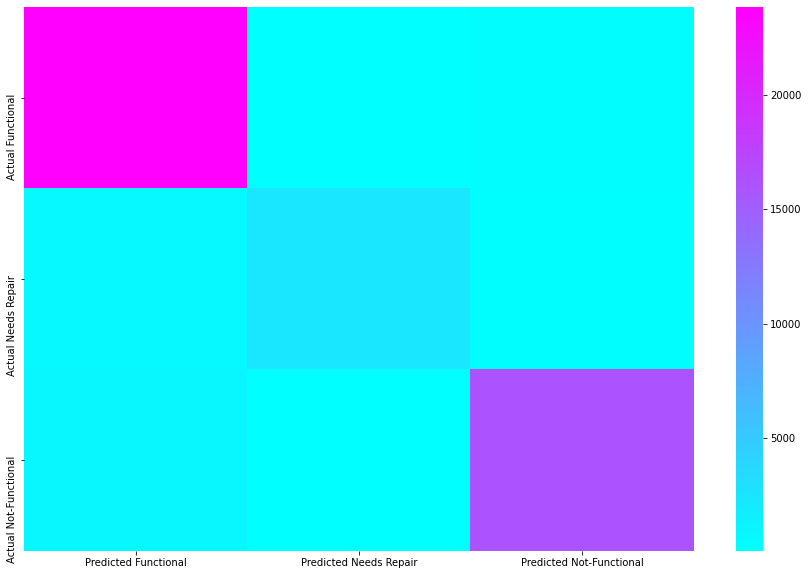

,Predicted Functional,Predicted Needs Repair,Predicted Not-Functional
Actual Functional,23851,92,251
Actual Needs Repair,685,2357,196
Actual Not-Functional,831,61,16226


In [51]:
rcParams['figure.figsize'] = 15, 10
print("Decision tree metric and heatmap\n")
con_matrix_analysis(rf)

## XG boost classifier

In [35]:
from xgboost import XGBClassifier
import sklearn
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
xgbst = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=1)
folds = 3
param_comb = 5
sk = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
score = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'weighted')
params = {'min_child_weight': [1, 5, 10],'gamma': [0.5, 1, 1.5, 2, 5],'subsample': [0.6, 0.8, 1.0],'colsample_bytree': [0.6, 0.8, 1.0],'max_depth': [3, 4, 5]  }
random_search = RandomizedSearchCV(xgbst, param_distributions=params, n_iter=param_comb, scoring=score, n_jobs=4, cv=sk.split(X_train,y ), verbose=3, random_state=1001 )
random_search.fit(X_train, y )

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed: 16.5min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fc759fa7f50>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.02, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=600,
                                           n_jobs=1, nthread=1,
                                           objective='binary:logist...
                                           seed=None, silent=True, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=4,
                   param_distributions={'colsample

In [37]:
print('Accuracy obtained:',random_search.best_score_)

Accuracy obtained: 0.7571056882102631


In [38]:
# Read the top 5 results as a dataframe sorted by rank_test_score
pd.DataFrame(random_search.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_min_child_weight,param_max_depth,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,302.988189,0.929482,6.739441,0.147034,0.6,1,5,1.5,0.8,"{'subsample': 0.6, 'min_child_weight': 1, 'max...",0.752971,0.758272,0.760074,0.757106,0.003015,1
2,290.265268,2.121054,6.396246,0.163544,0.8,5,5,1,0.8,"{'subsample': 0.8, 'min_child_weight': 5, 'max...",0.751439,0.757489,0.758300,0.755743,0.003061,2
3,228.147344,1.544551,6.087329,0.073703,1,5,5,5,0.6,"{'subsample': 1.0, 'min_child_weight': 5, 'max...",0.744055,0.747882,0.745477,0.745805,0.001579,3
4,218.478831,14.822832,2.707357,0.795440,0.8,1,4,1,1,"{'subsample': 0.8, 'min_child_weight': 1, 'max...",0.735487,0.739668,0.738266,0.737807,0.001737,4
0,193.535849,0.541729,3.965767,0.021830,1,5,3,5,1,"{'subsample': 1.0, 'min_child_weight': 5, 'max...",0.716839,0.720780,0.716854,0.718158,0.001854,5


In [42]:
!pip install eli5

     |████████████████████████████████| 112kB 6.2MB/s 


In [46]:
for col in X_test.columns:
  if X_test[col].dtype.name in ['object']:
    X_test[col] = oe.fit_transform(X_test[[col]].astype(str))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

Important features with their respective weights

In [49]:
import eli5
from eli5.sklearn import PermutationImportance

# Instantiate. prefit means cv already done
permuter = PermutationImportance(random_search.best_estimator_, scoring='accuracy', cv='prefit', n_iter=3,
                                 random_state=42)
# Fit to test validation set
permuter.fit(X_train, y)

# Display Feature Importance
feature_names = X_train.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.0850 ± 0.0030,quantity
0.0471 ± 0.0007,waterpoint_type
0.0229 ± 0.0008,time_lapsed
0.0167 ± 0.0006,longitude
0.0134 ± 0.0005,lga
0.0133 ± 0.0008,latitude
0.0122 ± 0.0011,source
0.0110 ± 0.0018,extraction_type
0.0110 ± 0.0006,funder
0.0096 ± 0.0005,payment


As observed we can neglect the features lower in the table and can choose the top 2 features as they are are the most important feature for prediction.